In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/women-entrepreneurship-and-labor-force/Dataset3.csv


In [151]:
from matplotlib import pyplot as plt
%matplotlib inline

**Load dataset**

In [152]:
df = pd.read_csv('../input/women-entrepreneurship-and-labor-force/Dataset3.csv', sep=';') 

In [153]:
df.head(5)

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [154]:
df.shape

(51, 9)

In [155]:
df.columns

Index(['No', 'Country', 'Level of development', 'European Union Membership',
       'Currency', 'Women Entrepreneurship Index', 'Entrepreneurship Index',
       'Inflation rate', 'Female Labor Force Participation Rate'],
      dtype='object')

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [157]:
df.describe()

,No,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,29.980392,47.835294,47.241176,2.587647,58.481765
std,18.017203,14.268480,16.193149,5.380639,13.864567
min,1.000000,25.300000,24.800000,-2.250000,13.000000
25%,14.500000,36.350000,31.900000,-0.500000,55.800000
50%,30.000000,44.500000,42.700000,0.600000,61.000000
75%,45.500000,59.150000,65.400000,3.600000,67.400000
max,60.000000,74.800000,77.600000,26.500000,82.300000


In [158]:
df.corr()

,No,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
No,1.000000,0.107324,0.121687,-0.136945,-0.077828
Women Entrepreneurship Index,0.107324,1.000000,0.914580,-0.455532,0.441372
Entrepreneurship Index,0.121687,0.914580,1.000000,-0.395370,0.334170
Inflation rate,-0.136945,-0.455532,-0.395370,1.000000,-0.139802
Female Labor Force Participation Rate,-0.077828,0.441372,0.334170,-0.139802,1.000000


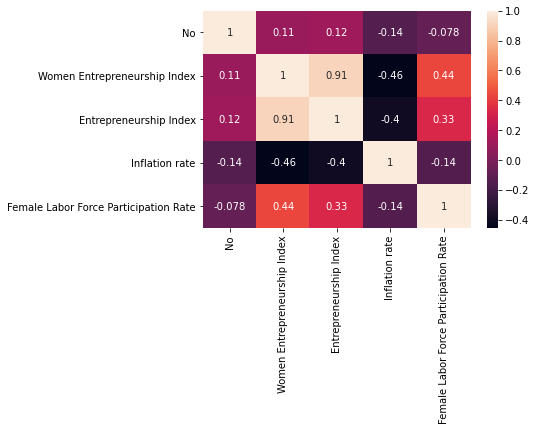

In [159]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [160]:
# Women enterprenuership is positively correlated with enterpreneurship index and female labor force participation

In [161]:
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [162]:
df.groupby('Currency')['Currency'].agg('count')

Currency
Euro                 15
National Currency    36
Name: Currency, dtype: int64

In [163]:
df.groupby('Level of development')['Level of development'].agg('count')

Level of development
Developed     27
Developing    24
Name: Level of development, dtype: int64

In [164]:
df.nunique()

No                                       51
Country                                  51
Level of development                      2
European Union Membership                 2
Currency                                  2
Women Entrepreneurship Index             50
Entrepreneurship Index                   49
Inflation rate                           37
Female Labor Force Participation Rate    48
dtype: int64

In [165]:
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


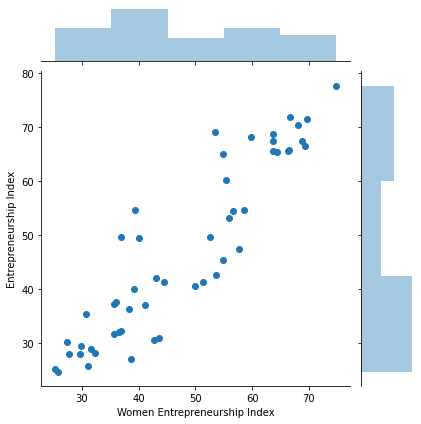

In [166]:
sns.jointplot(x='Women Entrepreneurship Index', y='Entrepreneurship Index', data=df)

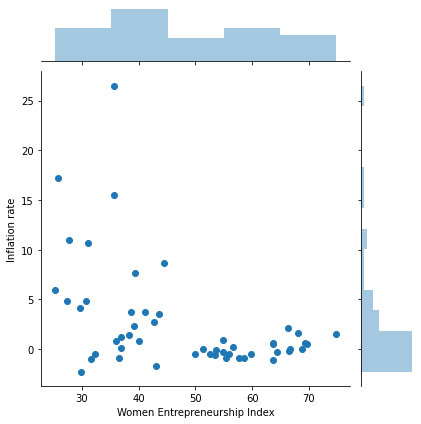

In [167]:
sns.jointplot(x='Women Entrepreneurship Index', y='Inflation rate', data=df)

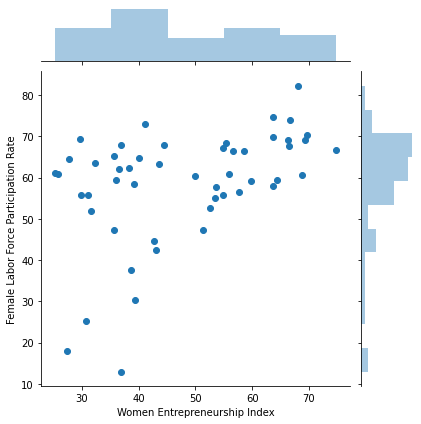

In [168]:

sns.jointplot(x='Women Entrepreneurship Index', y='Female Labor Force Participation Rate', data=df)


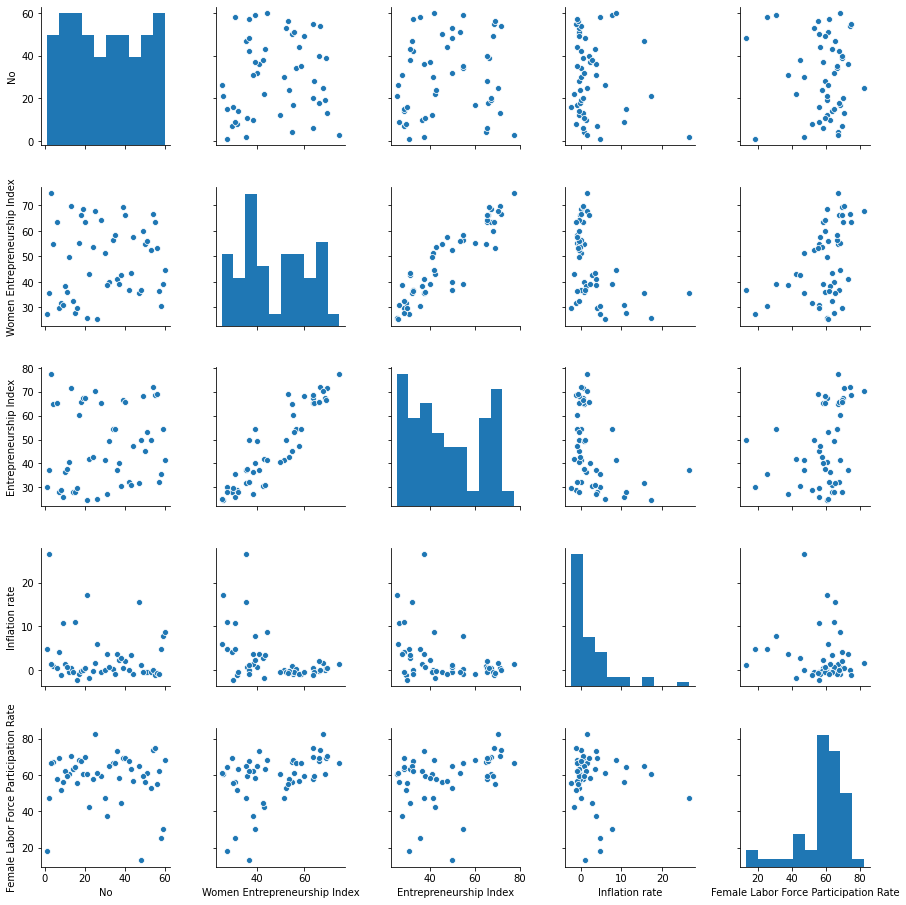

In [169]:
sns.pairplot(data=df)

In [170]:
df.head(3)

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5


In [171]:
c = ['European Union Membership','Currency','Level of development']
df1 = df.copy()
dum = pd.get_dummies(df1[c])
dum.head(3)

,European Union Membership_Member,European Union Membership_Not Member,Currency_Euro,Currency_National Currency,Level of development_Developed,Level of development_Developing
0,1,0,1,0,1,0
1,1,0,1,0,1,0
2,1,0,1,0,1,0


In [172]:
dum = dum.drop(['European Union Membership_Not Member', 'Currency_National Currency', 'Level of development_Developing'], axis=1)
dum.head(3)

,European Union Membership_Member,Currency_Euro,Level of development_Developed
0,1,1,1
1,1,1,1
2,1,1,1


In [173]:
df1 = pd.concat([df, dum], axis=1)

In [174]:
df1


,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,European Union Membership_Member,Currency_Euro,Level of development_Developed
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.10,1,1,1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.00,1,1,1
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.50,1,1,1
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.70,1,1,1
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.60,1,1,1
5,20,Germany,Developed,Member,Euro,63.6,67.4,0.50,69.90,1,1,1
6,22,Greece,Developed,Member,Euro,43.0,42.0,-1.70,42.50,1,1,1
7,28,Ireland,Developed,Member,Euro,64.3,65.3,-0.30,59.40,1,1,1
8,30,Italy,Developed,Member,Euro,51.4,41.3,0.00,47.20,1,1,1
9,34,Latvia,Developed,Member,Euro,56.6,54.5,0.20,66.40,1,1,1


In [175]:
df2 = df1.drop(['Level of development','European Union Membership','Currency'], axis=1)
df2.head(3)

,No,Country,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,European Union Membership_Member,Currency_Euro,Level of development_Developed
0,4,Austria,54.9,64.9,0.90,67.1,1,1,1
1,6,Belgium,63.6,65.5,0.60,58.0,1,1,1
2,17,Estonia,55.4,60.2,-0.88,68.5,1,1,1


In [176]:
df2.corr()

,No,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,European Union Membership_Member,Currency_Euro,Level of development_Developed
No,1.000000,0.107324,0.121687,-0.136945,-0.077828,-0.059900,-0.057184,0.051813
Women Entrepreneurship Index,0.107324,1.000000,0.914580,-0.455532,0.441372,0.625371,0.491834,0.865168
Entrepreneurship Index,0.121687,0.914580,1.000000,-0.395370,0.334170,0.481864,0.415157,0.809970
Inflation rate,-0.136945,-0.455532,-0.395370,1.000000,-0.139802,-0.416360,-0.333552,-0.512364
Female Labor Force Participation Rate,-0.077828,0.441372,0.334170,-0.139802,1.000000,0.181569,0.110886,0.356474
European Union Membership_Member,-0.059900,0.625371,0.481864,-0.416360,0.181569,1.000000,0.803638,0.757282
Currency_Euro,-0.057184,0.491834,0.415157,-0.333552,0.110886,0.803638,1.000000,0.608581
Level of development_Developed,0.051813,0.865168,0.809970,-0.512364,0.356474,0.757282,0.608581,1.000000


In [177]:
# Women Entrepreneurship Index is negatively correlated with infaltion rate, so we can drop it

In [178]:
df3 = df2.drop(['Inflation rate','No','Country'], axis=1)

In [179]:
df3.head(3)

,Women Entrepreneurship Index,Entrepreneurship Index,Female Labor Force Participation Rate,European Union Membership_Member,Currency_Euro,Level of development_Developed
0,54.9,64.9,67.1,1,1,1
1,63.6,65.5,58.0,1,1,1
2,55.4,60.2,68.5,1,1,1


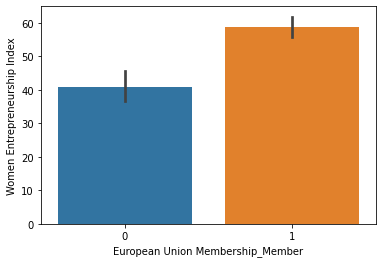

In [180]:
sns.barplot(x='European Union Membership_Member',y='Women Entrepreneurship Index', data=df2)

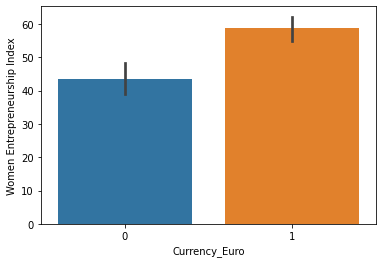

In [181]:
sns.barplot(x='Currency_Euro', y='Women Entrepreneurship Index', data=df2)

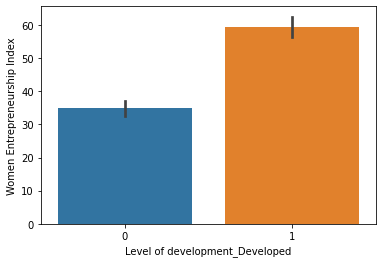

In [182]:
sns.barplot(x='Level of development_Developed', y='Women Entrepreneurship Index', data=df2)

In [183]:
df3.head(2)

,Women Entrepreneurship Index,Entrepreneurship Index,Female Labor Force Participation Rate,European Union Membership_Member,Currency_Euro,Level of development_Developed
0,54.9,64.9,67.1,1,1,1
1,63.6,65.5,58.0,1,1,1


In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:

d = ['Entrepreneurship Index','Female Labor Force Participation Rate']
obj = StandardScaler()
df3[d] = obj.fit_transform(df3[d])

In [186]:
df3.head()

,Women Entrepreneurship Index,Entrepreneurship Index,Female Labor Force Participation Rate,European Union Membership_Member,Currency_Euro,Level of development_Developed
0,54.9,1.101363,0.627787,1,1,1
1,63.6,1.138785,-0.035094,1,1,1
2,55.4,0.808229,0.729768,1,1,1
3,66.4,1.151258,0.671493,1,1,1
4,68.8,1.251049,0.154301,1,1,1


In [187]:
X = df3.drop(['Women Entrepreneurship Index'], axis=1)
y = df3['Women Entrepreneurship Index']

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [189]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

40
11
40
11


In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [191]:
obj1 = LinearRegression()
obj1.fit(X_train, y_train)

LinearRegression()

In [192]:
y_predict = obj1.predict(X_test)

In [193]:
from sklearn import metrics

In [194]:
print('MAE :'," ", metrics.mean_absolute_error(y_test, y_predict))

MAE :   3.727453604006898


In [195]:
print('MSE :'," ", metrics.mean_squared_error(y_test, y_predict))

MSE :   36.54799984354747


In [196]:
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

RMAE :   6.045494176950919


In [197]:
obj1.score(X_train, y_train)

0.9114681077204234

In [198]:
obj1.coef_

array([ 8.20270986,  1.46724642,  1.3126176 , -1.80506197, 10.87159005])